Download the resource csv data files below and begin performing high-level data checks such as:

- Creating and interpreting high-level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)
- Derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment

LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.



In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## LIFESTAGE 

In [11]:
df = pd.read_csv('QVI_purchase_behaviour.csv')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [15]:
df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [19]:
#the distribution of values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(df[col].value_counts())

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


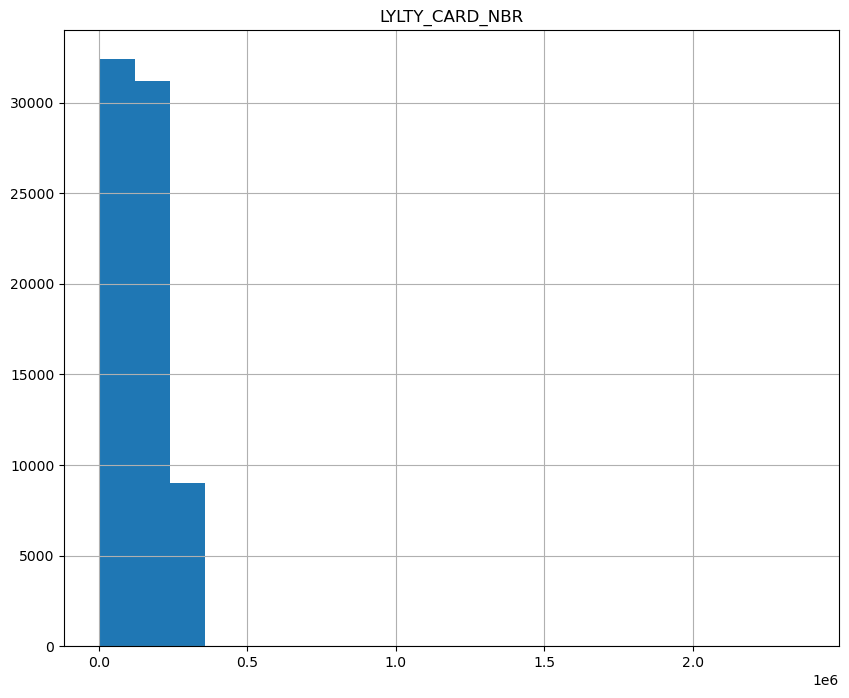

In [21]:
# Plot histograms for numeric columns
df.hist(figsize=(10, 8), bins=20)
plt.show()

## PREMIUM_CUSTOMER

In [8]:
file_path = 'QVI_transaction_data.xlsx'
df2 = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [14]:
df2.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [17]:
df2.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
#the distribution of values in categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(df2[col].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


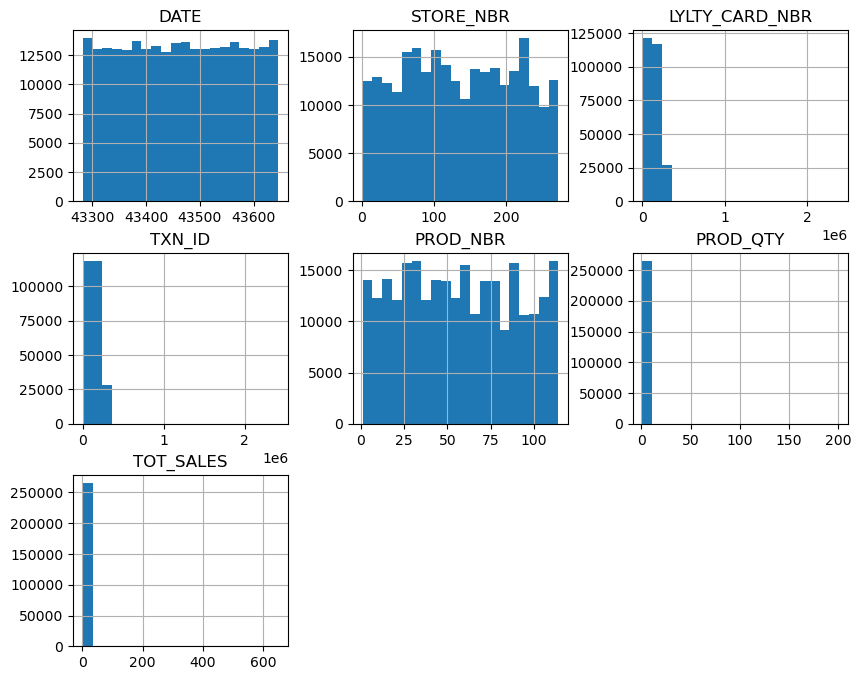

In [22]:
# Plot histograms for numeric columns
df2.hist(figsize=(10, 8), bins=20)
plt.show()

### Extract Pack Size and Brand Name 
- Purpose: Extracting PACK_SIZE and BRAND from the PROD_NAME column adds new features that can provide valuable insights.
- Necessity: These features help us analyze customer preferences more granularly. For example, understanding if certain pack sizes or brands are more popular can help in segmenting the market and targeting promotions effectively.

In [29]:
# Extract pack size and brand from PRODUCT_NAME in transaction_data_df
df2['PACK_SIZE'] = df2['PROD_NAME'].str.extract(r'(\d+)g')
df2['PACK_SIZE'] = df2['PACK_SIZE'].fillna(0).astype(int)

df2['BRAND'] = df2['PROD_NAME'].str.extract(r'([A-Za-z]+)')

# Display the dataframe with new features
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


### Merge the dataset
- Purpose: Combining the transaction data with customer purchase behavior data allows us to have a unified dataset that includes both transaction details and customer segmentation.
- Necessity: Merging the datasets is crucial for comprehensive analysis. It allows us to connect customer segments with their purchasing behavior, enabling us to draw insights about different customer groups.

In [31]:
# Merge the transaction data with the purchase behaviour data
merged_df = pd.merge(df2, df, on='LYLTY_CARD_NBR')

# Display the merged dataframe
merged_df.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


### Define Metric of Interest 
- Total Spend by Each Customer Segment: Calculate the total spend by each customer segment.

- Average Spend per Transaction: Calculate the average spend per transaction for each customer segment.

- Total Quantity Purchased by Each Customer Segment: Calculate the total quantity purchased by each customer segment.

.
.
.
.
.
- Purpose: Defining and calculating metrics such as total spend, average spend per transaction, and total quantity purchased helps us understand the purchasing behavior of different customer segments.
- Necessity: Metrics provide quantitative insights that are essential for making data-driven decisions. They help identify trends, patterns, and anomalies in the data, and they support strategic planning and marketing efforts.

In [33]:
# Calculate total spend per transaction
merged_df['TOTAL_SPEND'] = merged_df['TOT_SALES']

# Group by customer segment and calculate metrics
metrics = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOTAL_SPEND': 'sum',
    'TOT_SALES': 'mean',
    'PROD_QTY': 'sum'
}).rename(columns={'TOT_SALES': 'AVG_SPEND_PER_TRANSACTION', 'PROD_QTY': 'TOTAL_QUANTITY'})

# Display the metrics
metrics

TOTAL_SPEND  \
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget               35514.80   
                       Mainstream           90803.85   
                       Premium              58432.65   
NEW FAMILIES           Budget               21928.45   
                       Mainstream           17013.90   
                       Premium              11491.10   
OLDER FAMILIES         Budget              168363.25   
                       Mainstream          103445.55   
                       Premium              81958.40   
OLDER SINGLES/COUPLES  Budget              136769.80   
                       Mainstream          133393.80   
                       Premium             132263.15   
RETIREES               Budget              113147.80   
                       Mainstream          155677.05   
                       Premium              97646.05   
YOUNG FAMILIES         Budget              139345.85   
                       Mainstream           92788.75   
                       Premium              84025.50   
YOUNG SINGLES/COUPLES  Budget               61141.60   
                       Mainstream          157621.60   
                       Premium              41642.10   

                                         AVG_SPEND_PER_TRANSACTION  \
LIFESTAGE              PREMIUM_CUSTOMER                              
MIDAGE SINGLES/COUPLES Budget                             7.074661   
                       Mainstream                         7.647284   
                       Premium                            7.112056   
NEW FAMILIES           Budget                             7.297321   
                       Mainstream                         7.317806   
                       Premium                            7.231655   
OLDER FAMILIES         Budget                             7.269570   
                       Mainstream                         7.262395   
                       Premium                            7.322945   
OLDER SINGLES/COUPLES  Budget                             7.430315   
                       Mainstream                         7.282116   
                       Premium                            7.449766   
RETIREES               Budget                             7.443445   
                       Mainstream                         7.252262   
                       Premium                            7.456174   
YOUNG FAMILIES         Budget                             7.287201   
                       Mainstream                         7.189025   
                       Premium                            7.266756   
YOUNG SINGLES/COUPLES  Budget                             6.615624   
                       Mainstream                         7.558339   
                       Premium                            6.629852   

                                         TOTAL_QUANTITY  
LIFESTAGE              PREMIUM_CUSTOMER                  
MIDAGE SINGLES/COUPLES Budget                      9496  
                       Mainstream                 22699  
                       Premium                    15526  
NEW FAMILIES           Budget                      5571  
                       Mainstream                  4319  
                       Premium                     2957  
OLDER FAMILIES         Budget                     45065  
                       Mainstream                 27756  
                       Premium                    22171  
OLDER SINGLES/COUPLES  Budget                     35220  
                       Mainstream                 34997  
                       Premium                    33986  
RETIREES               Budget                     28764  
                       Mainstream                 40518  
                       Premium                    24884  
YOUNG FAMILIES         Budget                     37111  
                       Mainstream                 25044  
                       Premium         

### Draw Insights
- Customer Segments that Spend the Most:Identify which customer segments have the highest total spend.
- Most Popular Brands: Determine which brands are most popular based on total spend and quantity.
- Influence of Pack Size on Spend: Analyze how different pack sizes influence the total spend.
.
.
.
.
.
- Purpose: This step involves analyzing the metrics to draw actionable insights, such as identifying top spending segments, popular brands, and the influence of pack size on spend.
- Necessity: Drawing insights is the ultimate goal of data analysis. It helps us understand customer behavior, which in turn can inform business strategies, marketing campaigns, and operational improvements. By identifying key trends and patterns, businesses can make informed decisions that drive growth and efficiency.

In [35]:
# Identify customer segments with the highest total spend
top_spending_segments = metrics.sort_values(by='TOTAL_SPEND', ascending=False)
print(top_spending_segments)

# Determine most popular brands
popular_brands = merged_df.groupby('BRAND').agg({
    'TOTAL_SPEND': 'sum',
    'PROD_QTY': 'sum'
}).sort_values(by='TOTAL_SPEND', ascending=False)
print(popular_brands)

# Analyze influence of pack size on spend
pack_size_influence = merged_df.groupby('PACK_SIZE').agg({
    'TOTAL_SPEND': 'sum',
    'PROD_QTY': 'sum'
}).sort_values(by='TOTAL_SPEND', ascending=False)

pack_size_influence

                                         TOTAL_SPEND  \
LIFESTAGE              PREMIUM_CUSTOMER                
OLDER FAMILIES         Budget              168363.25   
YOUNG SINGLES/COUPLES  Mainstream          157621.60   
RETIREES               Mainstream          155677.05   
YOUNG FAMILIES         Budget              139345.85   
OLDER SINGLES/COUPLES  Budget              136769.80   
                       Mainstream          133393.80   
                       Premium             132263.15   
RETIREES               Budget              113147.80   
OLDER FAMILIES         Mainstream          103445.55   
RETIREES               Premium              97646.05   
YOUNG FAMILIES         Mainstream           92788.75   
MIDAGE SINGLES/COUPLES Mainstream           90803.85   
YOUNG FAMILIES         Premium              84025.50   
OLDER FAMILIES         Premium              81958.40   
YOUNG SINGLES/COUPLES  Budget               61141.60   
MIDAGE SINGLES/COUPLES Premium              5843

,TOTAL_SPEND,PROD_QTY
PACK_SIZE,,
175,477112.4,123692
150,296609.7,79330
134,177655.5,48019
110,162765.4,42835
170,146673.0,38088
330,136794.3,23999
300,113330.6,28813
165,101360.6,29051
380,76719.6,12673


#### SUMMARY

- Extracting Features: Adds valuable information for deeper analysis.
- Merging Data: Combines customer and transaction data for a complete view.
- Defining Metrics: Quantifies customer behavior and transaction details.
- Drawing Insights: Provides actionable information for strategic decisions.